# Magnus effect: Lift on a cylinder

Remember when we computed uniform flow past a doublet resulting in the stream-line pattern produced flow around a cylinder. When studying the pressure coefficient, we realized that the drag on the cylinder was exactly zero (_D'Alembert paradox_).

A perfectly circular cylinder can experience lift if it rotates, look for __Magnus__ effect.


The equations for the flow of a doublet. In Cartesian coordinates, a doublet located at the origin has a stream function and velocity components given by

$$\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{y}{x^2+y^2}$$


$$u\left(x,y\right) = \frac{\partial\psi}{\partial y} = -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2}$$

$$v\left(x,y\right) = -\frac{\partial\psi}{\partial x} = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$$

Lets try to compute it:
We'll place a doublet of strength $\kappa=1$ at the origin, and add a free stream $U_\infty=1$. 
We can re-use the code we have written before by encupsulating the functions we've written in `/.py` files; this is always a good thing.
The files are placed in a `base_flow/` folder. Notice also the `__init__.py` file, from pythion docs: 

"The __init__.py files are required to make Python treat directories containing the file as packages (unless using a namespace package, a relatively advanced feature). This prevents directories with a common name, such as string, from unintentionally hiding valid modules that occur later on the module search path. In the simplest case, __init__.py can just be an empty file, but it can also execute initialization code for the package or set the __all__ variable, described later."
    

In [1]:
from base_flows import uniform, source, doublet, vortex
import numpy as np
from matplotlib import pyplot as plt

In [2]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = np.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [3]:
kappa = 1.0                           # strength of the doublet
x_doublet, y_doublet = 0.0, 0.0       # location of the doublet
u_inf = 1.0                           # freestream speed

In [4]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = doublet.get_velocity(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = doublet.get_stream_function(kappa, x_doublet, y_doublet, X, Y)

# freestream velocity components
u_freestream,v_freestream  = uniform.get_velocity(u_inf,X,Y)

# stream-function of the freestream flow
psi_freestream = uniform.get_stream_function(u_inf,X,Y)

# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

0.3989422804014327


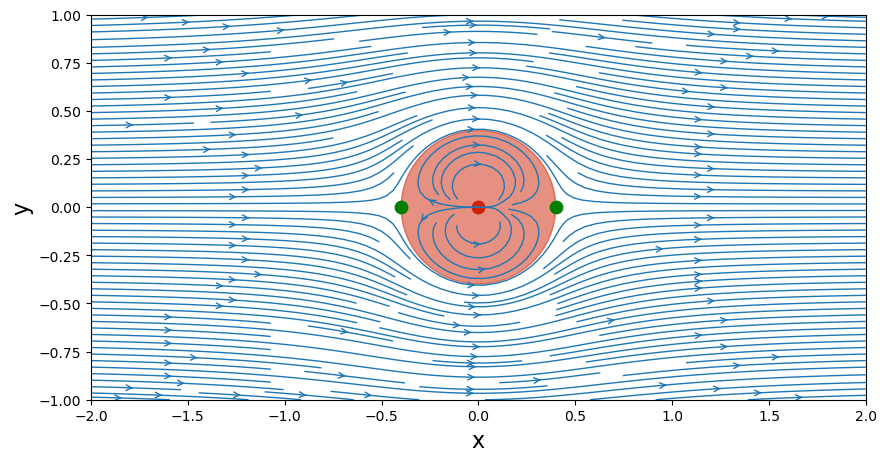

In [6]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the cylinder radius and add the cylinder to the figure
R = np.sqrt(kappa / (2 * np.pi * u_inf))
print(R)
circle = plt.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)

# calculate the stagnation points and add them to the figure
x_stagn1, y_stagn1 = +np.sqrt(kappa / (2 * np.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -np.sqrt(kappa / (2 * np.pi * u_inf)), 0.0
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

We obtained cylinder flow. 

Now, let's add a vortex located at the origin with a positive strength $\Gamma$. In Cartesian coordinates, the stream function and velocity components are given by:

$$\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left(x^2+y^2\right)$$

$$u\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2} \qquad v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}$$

In [7]:
gamma = 4.0                      # strength of the vortex
x_vortex, y_vortex = 0.0, 0.0    # location of the vortex

In [8]:
# compute the velocity field on the mesh grid
u_vortex, v_vortex = vortex.get_velocity(gamma, x_vortex, y_vortex, X, Y)

# compute the stream-function on the mesh grid
psi_vortex = vortex.get_stream_function(gamma, x_vortex, y_vortex, X, Y)

In [9]:
# superposition of the doublet and the vortex on the freestream flow
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

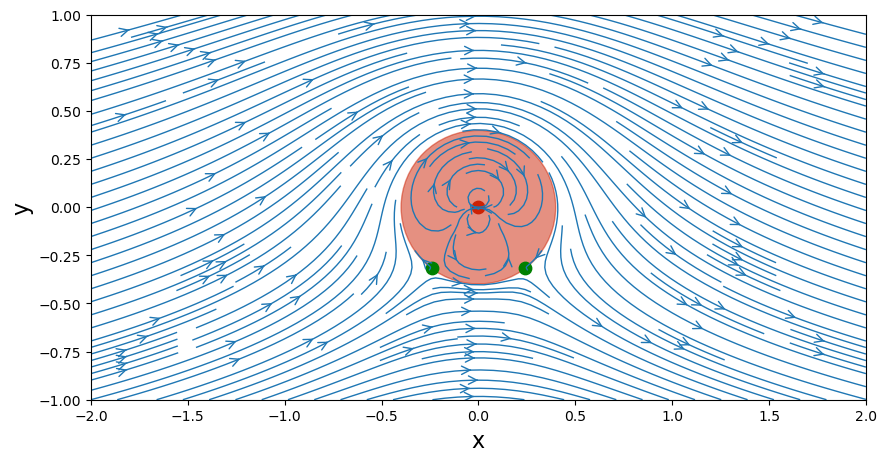

In [10]:
# calculate the cylinder radius
R = np.sqrt(kappa / (2 * np.pi * u_inf))

# calculate the stagnation points
x_stagn1, y_stagn1 = (+np.sqrt(R**2 - (gamma / (4 * np.pi * u_inf))**2),
                      -gamma / (4 * np.pi * u_inf))
x_stagn2, y_stagn2 = (-np.sqrt(R**2 - (gamma / (4 * np.pi * u_inf))**2),
                      -gamma / (4 * np.pi * u_inf))

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
circle = plt.Circle((0.0, 0.0), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)
plt.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

What hapens if $\ \frac{\Gamma}{4\pi U_\infty R} >1$?

Go back and experiment with a value of $\Gamma$ that causes this.
is the radius of the cylinder stayed the same?

## Pressure coefficient

From the doublet notebook, we know that the pressure coefficient is defined by

$$C_p = 1-\frac{U^2}{U_\infty^2}$$

where $U^2 = u^2+v^2 = u_r^2+u_\theta^2$.
(On the cylinder $u_{r}=0$)


$$u_r\left(r,\theta\right) = U_\infty \cos\theta \left(1-\frac{R^2}{r^2}\right)$$

$$u_\theta\left(r,\theta\right) = -U_\infty \sin\theta \left(1+\frac{R^2}{r^2}\right) - \frac{\Gamma}{2\pi r}$$

where $R$ is the cylinder radius.

We see that the radial component vanishes on the surface of the cylinder whereas the tangential velocity is given by

$$u_\theta\left(R,\theta\right) = -2U_\infty \sin\theta - \frac{\Gamma}{2\pi R} .$$

Note when there is no vortex, the tangential velocity on the cylinder becomes

$$u_\theta\left(R,\theta\right) = -2U_\infty \sin\theta .$$

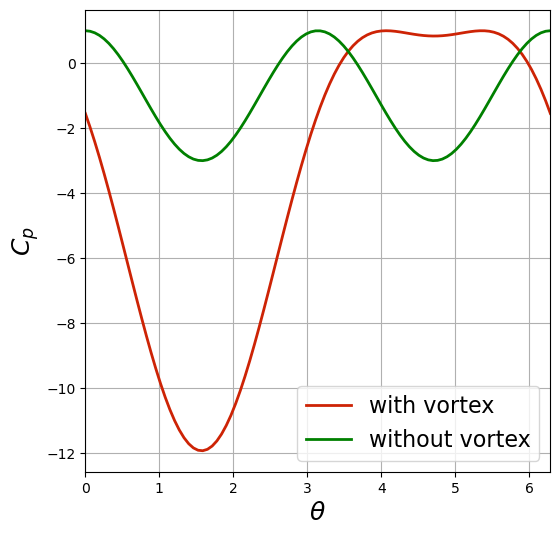

In [11]:
# calculate the surface tangential velocity on the cylinder
theta = np.linspace(0.0, 2 * np.pi, 100)
u_theta = -2 * u_inf * np.sin(theta) - gamma / (2 * np.pi * R)

# compute the surface pressure coefficient
cp = 1.0 - (u_theta / u_inf)**2

# if there was no vortex
u_theta_no_vortex = -2 * u_inf * np.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex / u_inf)**2

# plot the surface pressure coefficient
size = 6
plt.figure(figsize=(size, size))
plt.grid(True)
plt.xlabel(r'$\theta$', fontsize=18)
plt.ylabel('$C_p$', fontsize=18)
plt.xlim(theta.min(), theta.max())
plt.plot(theta, cp,
            label='with vortex', color='#CD2305', linewidth=2, linestyle='-')
plt.plot(theta, cp_no_vortex,
            label='without vortex', color='g', linewidth=2, linestyle='-')
plt.legend(loc='best', prop={'size':16});

## Lift and Drag
The lift is the component of force perpendicular to $U_\infty$, while the drag is the component parallel to $U_\infty$. How could we get them with the information we have above? 

Well, the force on the cylinder is a product of the pressure acting on its surface (there is no viscosity here: it's ideal flow). If you draw a free body diagram, you should see that:

$$D = -\int_0^{2\pi} p \ \cos\theta \ R \ d\theta$$

$$L = -\int_0^{2\pi} p \ \sin\theta \ R \ d\theta$$

chalenge:
Using Bernoulli's equation, replace $p$ in the equations above to obtain the lift and drag.

What does this mean?